# **Project: Enhanced Credit Card Fraud Detection with Model Comparison and Interactive Data Visualization**

## Description/Objectives
The purpose of this project is to detect fraudulent credit card transactions using machine learning techniques and evaluate models based on imbalanced data.

## Dataset Overview
- **Columns:** 31 (28 PCA-transformed features + Time, Amount, and Class)
- **Target Variable:** `Class` (0 = Non-Fraud, 1 = Fraud)
- **Challenge:** Highly imbalanced dataset (only 0.17% fraud transactions)

## Key Features/ Challenges

### Key Features
1. **Class Imbalance Solutions:**
   - Addressing the imbalance using techniques such as SMOTE (oversampling) and undersampling.

2. **Model Comparison:**
   - Evaluating multiple machine learning models (e.g., Logistic Regression, Random Forest, Neural Networks) on key metrics like precision, recall, F1 score, and AUC-ROC.

3. **Interactive Visualization:**
   - Developing a user-friendly web-based tool to visualize key performance metrics, confusion matrices, and fraud patterns dynamically.
   - Integration of SQL for dynamic querying of transaction patterns and model performance.

### Key Challenges
1. **Class Imbalance**: Ensuring that models effectively detect fraudulent transactions despite the small proportion of fraud cases.
2. **Model Robustness**: Comparing models to identify the best performer and optimizing performance without overfitting.
3. **Dynamic Insights**: Building a visualization tool to provide an intuitive interface for real-time data exploration and insights.


# **Handling Imbalanced Data**

## Description

### Data Loading and Exploration
- Load the dataset and inspect its structure.
- Visualize the distributions of features like `Amount` and `Time`.
- Analyze class distribution to understand the extent of imbalance.

### Preprocessing Steps
1. **Scaling Features:**
   - Standardize `Amount` and `Time` for consistency with PCA-transformed features.
2. **Handling Class Imbalance:**
   - Use Random Undersampling to balance classes for initial experiments.
   - Compare with SMOTE (Synthetic Minority Over-sampling Technique).
3. **Visualizations:**
   - Correlation heatmaps to identify influential features.
   - Boxplots for positively and negatively correlated features.

## Exploratory Data Analysis (EDA)

In [ ]:
# Imported Libraries
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf # deep learning library. Tensors are just multi-dimensional arrays
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
from sklearn.manifold import TSNE # Dimensionality reduction
from sklearn.decomposition import PCA, TruncatedSVD # Dimensionality reduction
import matplotlib.patches as mpatches # plot data
import time # time library
import kagglehub # Kaggle API wrapper

# Classifier Libraries
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier # K-nearest neighbors
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
import collections # Counter

# Other Libraries
from sklearn.model_selection import train_test_split # split data
from sklearn.pipeline import make_pipeline # Construct a pipeline from the given estimators
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline # Construct a pipeline from the given estimators
from imblearn.over_sampling import SMOTE # SMOTE
from imblearn.under_sampling import NearMiss # NearMiss
from imblearn.metrics import classification_report_imbalanced # Classification report for imbalanced data
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report # Metrics
from collections import Counter # Counter
from sklearn.model_selection import KFold, StratifiedKFold # K-Folds cross-validator
import warnings # Ignore warnings
warnings.filterwarnings("ignore")

# Check if file already exists
save_path = '../Data/creditcard.csv'
if not os.path.exists(save_path):
    print("File not found in the directory. Downloading...")
    # Download the dataset
    path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
    print("Path to dataset files:", path)

    # Load data into Pandas DataFrame
    file_path = path + '/creditcard.csv' 
    df = pd.read_csv(file_path)

    # Save the dataset into the 'Data' folder
    os.makedirs(os.path.dirname(save_path), exist_ok=True)  # Ensure directory exists
    df.to_csv(save_path, index=False)
    print(f"Dataset saved to: {save_path}")
else:
    print("File already exists. Skipping download.")
    df = pd.read_csv(save_path)

In [ ]:
# Dataset Shape
print("Dataset Shape:", df.shape)

# First 5 Rows
print("\nFirst 5 Rows:")
print(df.head())

Dataset Shape: (284807, 31)

First 5 Rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.

In [ ]:
# Check for missing values
print(f"\nMissing Values in Dataset: {df.isnull().sum().max()}")

# Check for duplicate rows
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


Missing Values in Dataset: 0

Number of duplicate rows: 1081


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

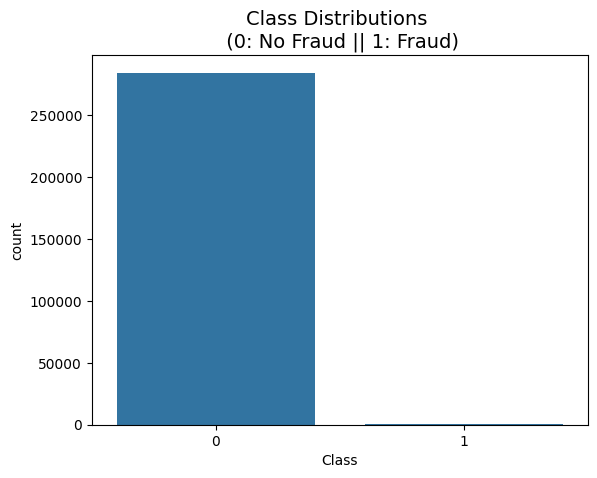

In [ ]:
# Visualize Class Distribution
sns.countplot(df, x= 'Class')
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

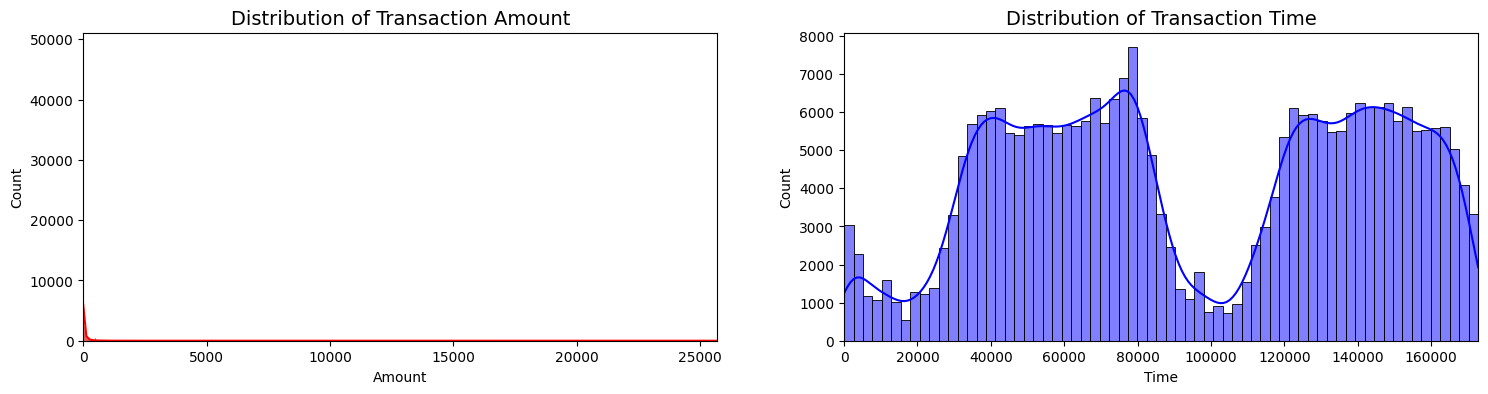

In [ ]:
# Visualize 'Amount' and 'Time' distributions
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

# Distribution of Amount
sns.histplot(df['Amount'], ax=ax[0], color='r', kde=True)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(df['Amount']), max(df['Amount'])])

# Distribution of Time
sns.histplot(df['Time'], ax=ax[1], color='b', kde=True)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(df['Time']), max(df['Time'])])

plt.show()

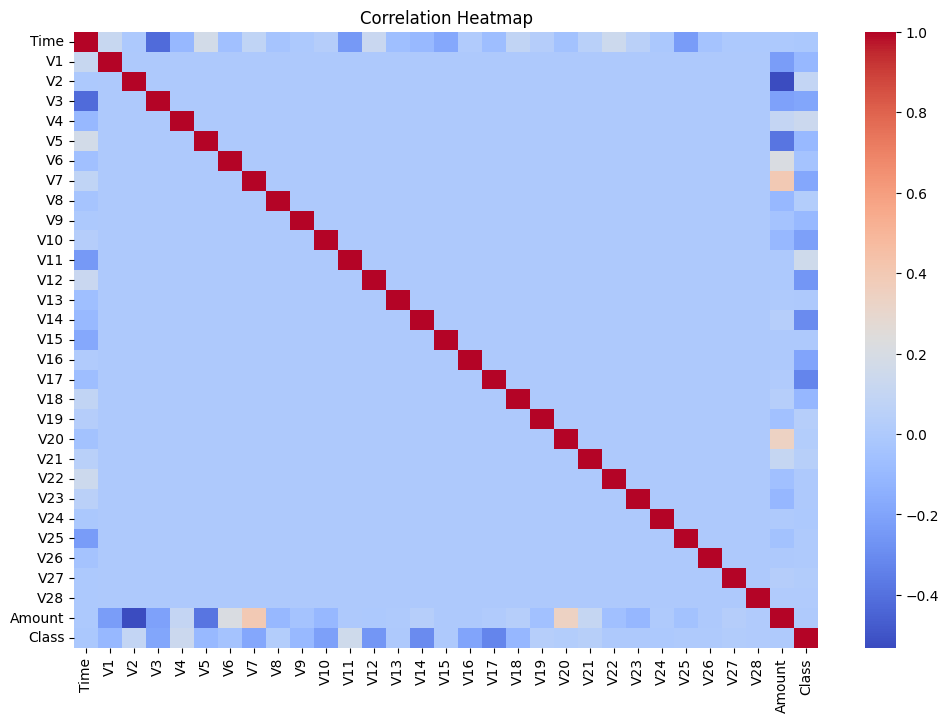

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

### **EDA Summary**

- **Class Imbalance:**
  - The dataset is highly imbalanced, with **99.83% legitimate transactions** and only **0.17% fraudulent transactions**.
  - Imbalanced data can lead to overfitting, where models assume most transactions are non-fraud and fail to detect fraud patterns.

- **Feature Scaling Needs:**
  - The `Time` and `Amount` features are **not PCA-transformed**, unlike other features.
  - These need to be scaled for consistency with PCA-transformed features.

- **Data Splitting:**
  - The dataset should be split into **training** and **testing** sets before applying sampling techniques (e.g., undersampling or SMOTE).
  - This ensures models trained on sampled data are tested on original data for generalizability.

- **Random Under-Sampling:**
  - Balances the dataset by reducing legitimate transactions to match fraudulent cases (492 each).
  - Risks **information loss**, which may impact model accuracy.
  - Data is shuffled to ensure **randomization** after sampling.

- **Key Subset Features:**
  - Created **scaled versions** of `Amount` and `Time` as `scaled_amount` and `scaled_time`.
  - The **balanced subset** contains **492 cases of fraud** and **492 cases of non-fraud**.

## Data Preprocessing


In [ ]:
# Since the majority of our data is already scaled (PCA-transformed features), we need to scale the remaining columns (Amount and Time) for consistency.
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler scales features using the median and the interquartile range (IQR), making it less sensitive to outliers compared to standard scaling methods.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are now Scaled
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
from sklearn.model_selection import train_test_split

# Print percentage distribution of fraud and non-fraud cases in the dataset
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100, 2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100, 2), '% of the dataset')

# Split the data into features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Check the distribution of the labels in the training and testing sets
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

print('-' * 100)
print('Label Distributions: \n')
print(train_counts_label / len(y_train))
print(test_counts_label / len(y_test))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827075 0.00172925]
[0.99827955 0.00172045]


In [ ]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Shuffle the data before creating the subsamples
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
238205,-0.307413,0.762215,1.788491,0.319713,-0.614862,3.281287,1.305819,2.471115,-0.411489,0.682912,...,-0.336432,-0.409374,-1.137791,0.571136,-1.069892,-0.727396,-0.519447,0.029297,-0.051848,0
150697,1.047998,0.108413,-12.381048,8.213022,-16.962530,7.116091,-9.772826,-3.666836,-16.147363,2.078706,...,0.537795,0.167703,1.503413,-0.767755,0.371951,-1.415639,-0.517022,-0.434621,0.292721,1
163859,0.227206,0.370810,-0.502070,0.781533,-1.190933,-1.158404,3.628642,3.435598,1.155029,0.762430,...,-0.123379,0.132749,0.299842,-0.323795,0.696382,0.592518,-0.578538,0.104168,0.122318,0
191690,-0.307413,0.524900,1.183931,3.057250,-6.161997,5.543972,1.617041,-1.848006,-1.005508,0.339937,...,0.252571,0.109185,-0.931072,-0.064175,-0.007013,0.345419,0.064558,0.476629,0.323740,1
16863,9.905121,-0.663189,-2.787248,-0.071340,-1.505288,3.361777,-3.357422,0.565835,0.303653,0.966914,...,1.607397,0.882940,-0.246202,1.752227,0.219925,0.156282,-0.265894,0.220694,0.256077,1


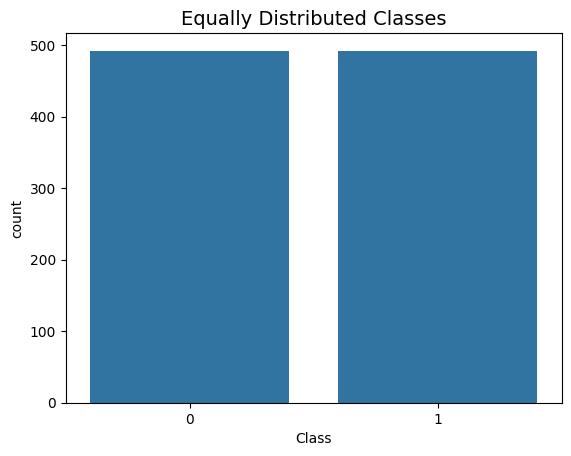

In [ ]:
# Confirm the distribution of the classes
sns.countplot(data= new_df, x ='Class')
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [ ]:
# Save the dataset into the 'Data' folder
save_path = '../Data/adjusted_creditcard.csv'  # Adjust relative path as needed

if os.path.exists(save_path):
    print(f"File already exists at: {save_path}. Skipping save.")
else:
    new_df.to_csv(save_path, index=False)
    print(f"Dataset saved to: {save_path}")

File already exists at: ../Data/adjusted_creditcard.csv. Skipping save.


## Correlation Matrix
Correlation matrices help us understand the relationships between features and their influence on fraud detection. Using the correct dataframe (subsample) ensures accurate correlations.

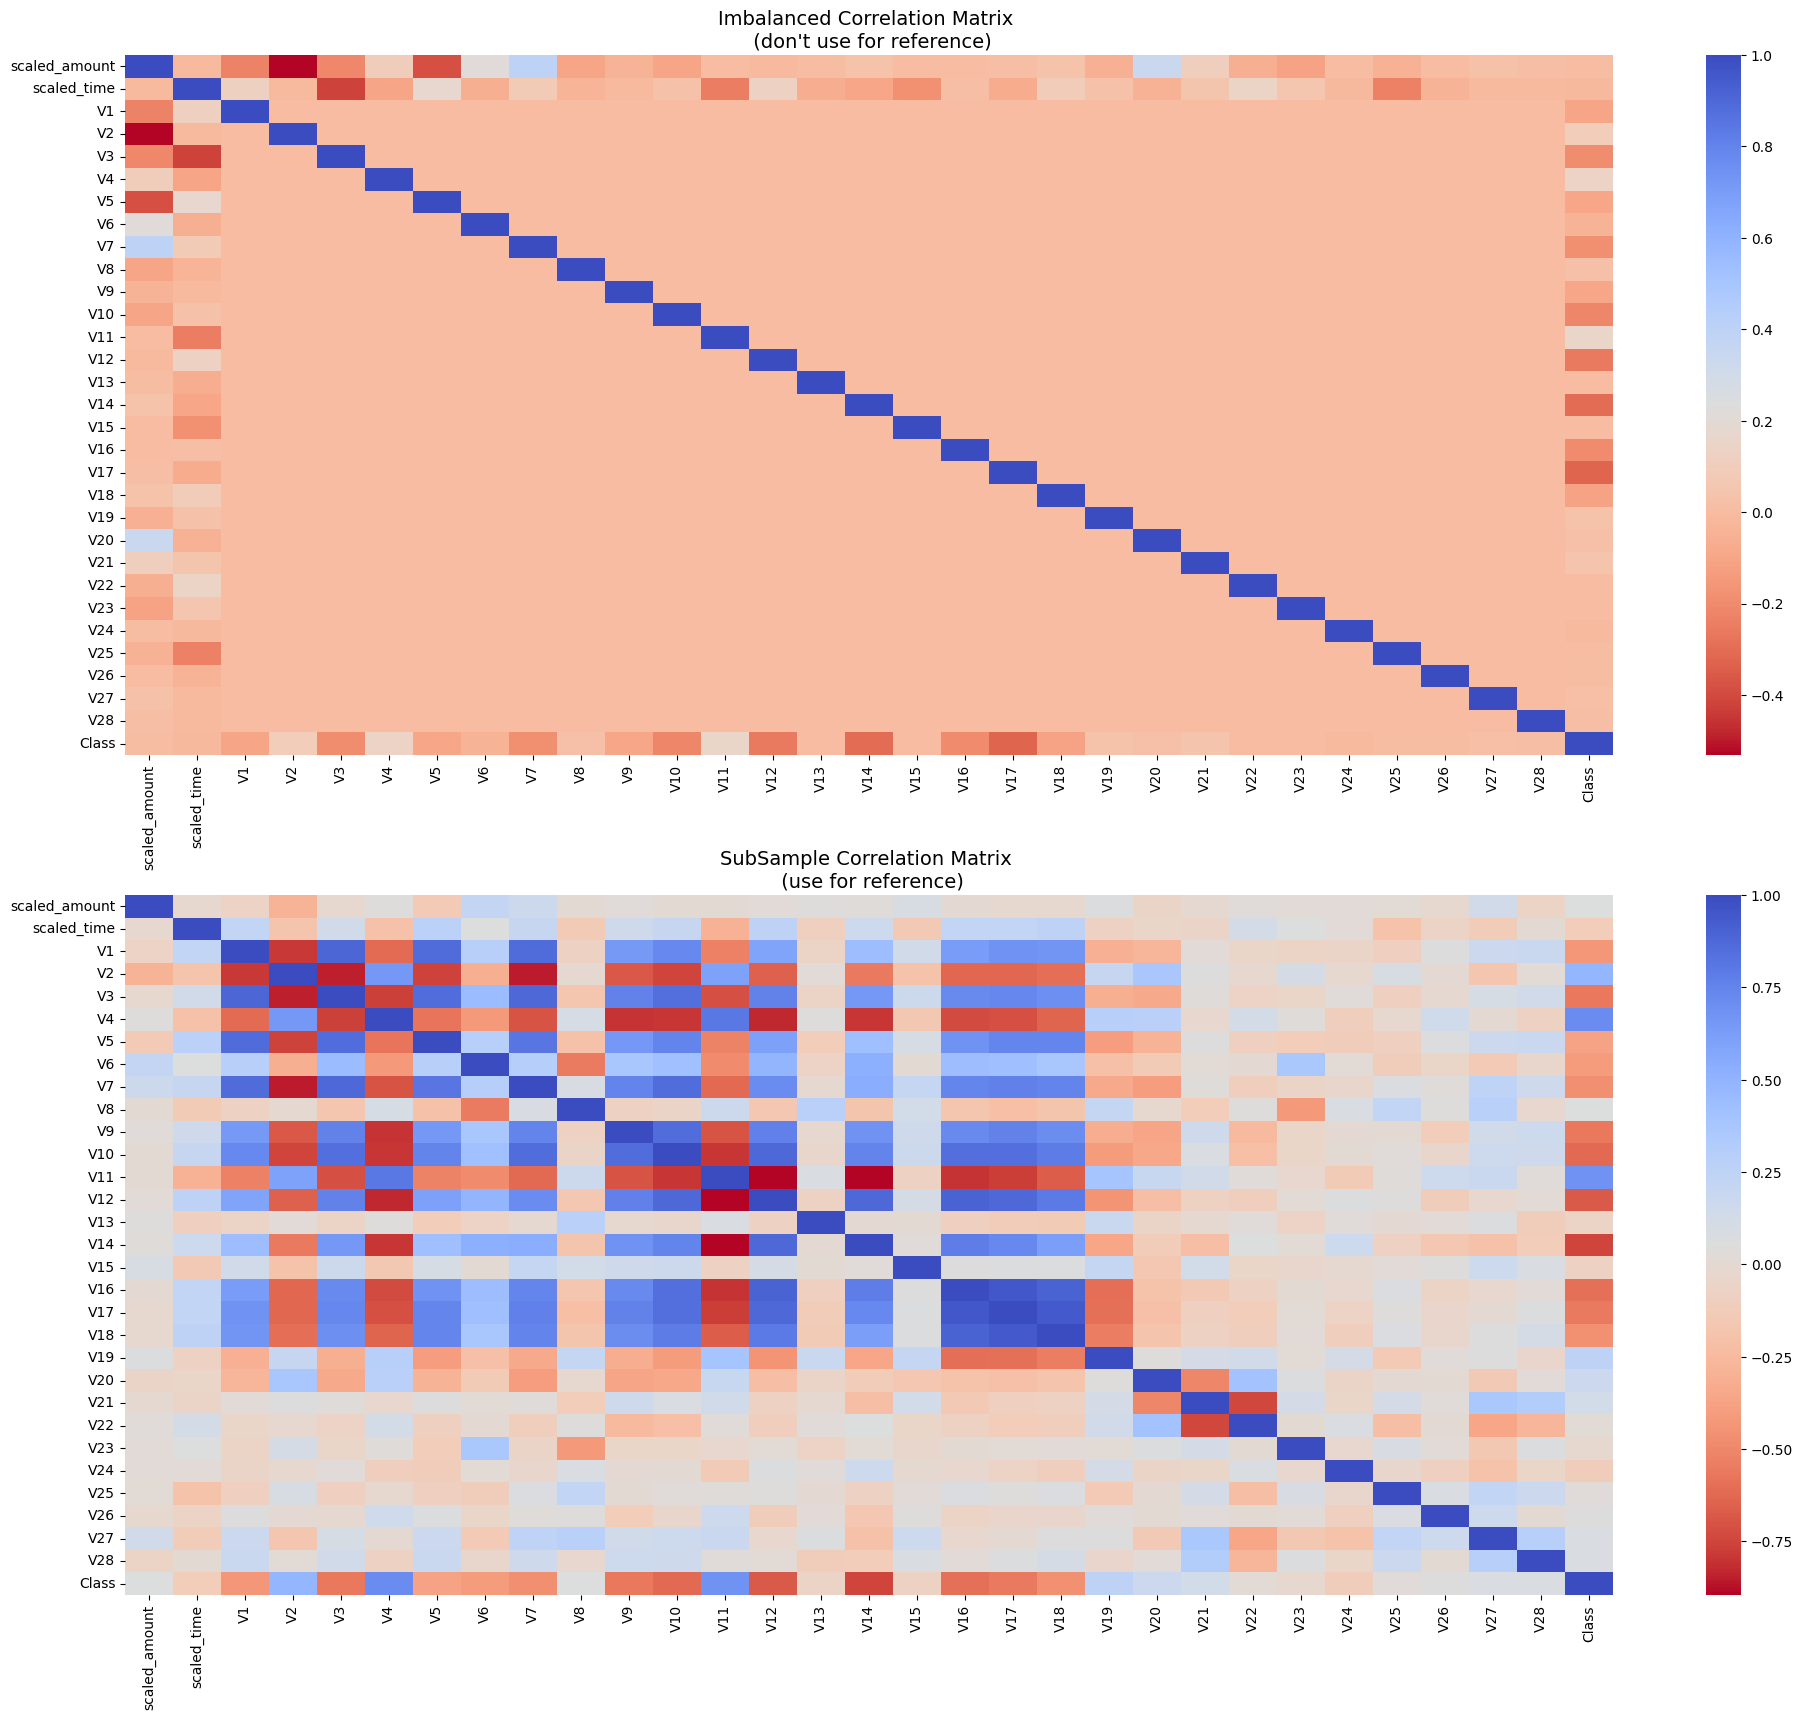

In [ ]:
# Make Two Plots
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Imbalanced Correlation Matrix
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

# SubSample Correlation Matrix
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

### Correlation Summary and Outlier Removal Plan

- **Negative Correlations:** Features like `V14`, `V12`, and `V10` are strongly negatively correlated with fraudulent transactions. Specifically:
  - Lower values in these features significantly increase the likelihood of a transaction being classified as fraud.
  - These features have distributions that show distinct separation between fraudulent and non-fraudulent transactions, making them key indicators for fraud detection.

- **Positive Correlations:** Features such as `V2`, `V4`, `V11`, and `V19` are positively correlated with fraudulent transactions. Higher values in these features suggest a higher likelihood of fraud.

- **Outlier Removal Plan:**
  - Outlier removal will be focused on `V14`, `V12`, and `V10` due to their high correlation with the target variable (`Class`).
  - Removing extreme outliers in these features can reduce noise and improve model accuracy by enhancing the signal for fraudulent transactions while preserving meaningful information.

- **BoxPlots:** Boxplots are used to visualize the distribution of these key features in fraudulent and non-fraudulent transactions, helping to identify and confirm the presence of extreme outliers.


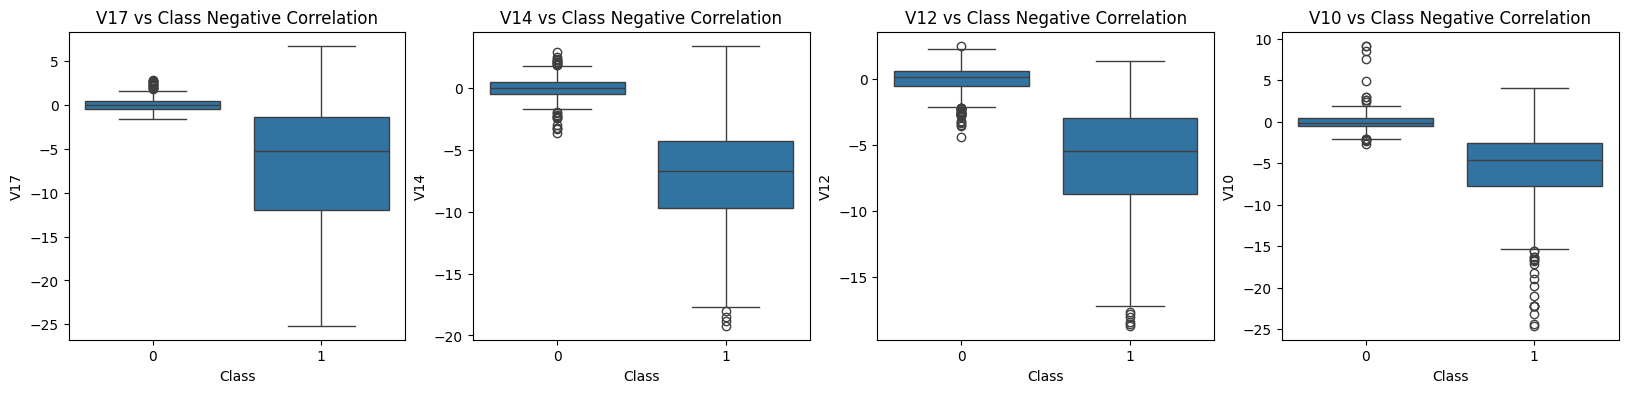

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

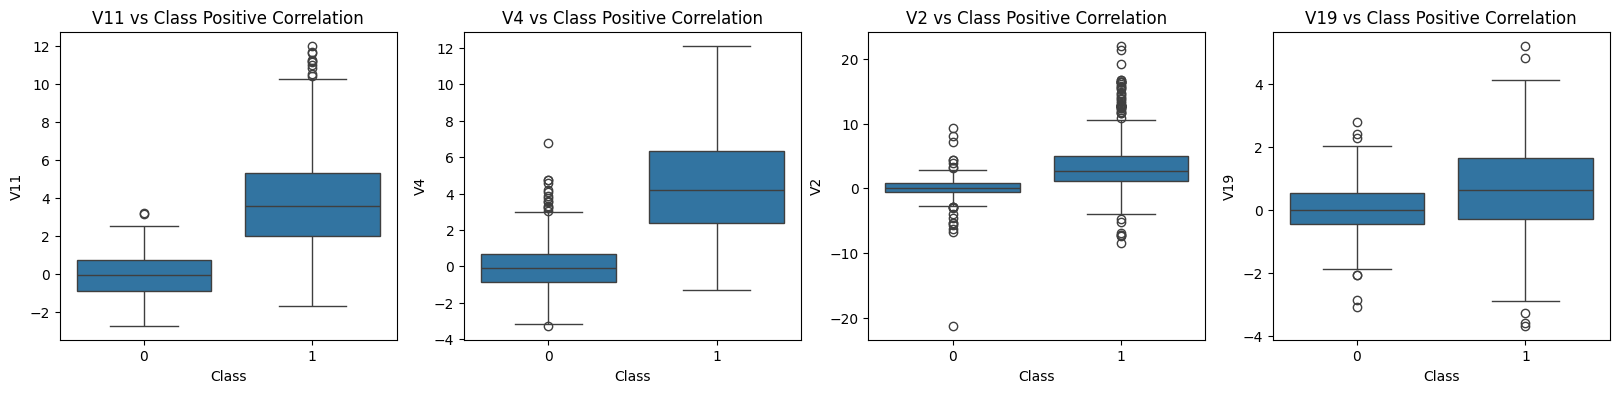

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df,  ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

## Anomaly Detection (Outliers)
Removing outliers is critical in imbalanced datasets to improve model accuracy and prevent skewed results. Outliers can distort the detection of fraudulent patterns, making it harder to distinguish between fraud and legitimate transactions.

#### Strategies:
- **Interquartile Range (IQR) Method:** Identify extreme outliers beyond the 25th and 75th percentiles using a threshold (e.g., 1.5 times the IQR).
- **Visual Analysis:** Use boxplots to highlight extreme values and confirm the reduction of outliers.
- **Tradeoff Consideration:** Balancing between removing outliers and retaining essential information to avoid impacting model performance.

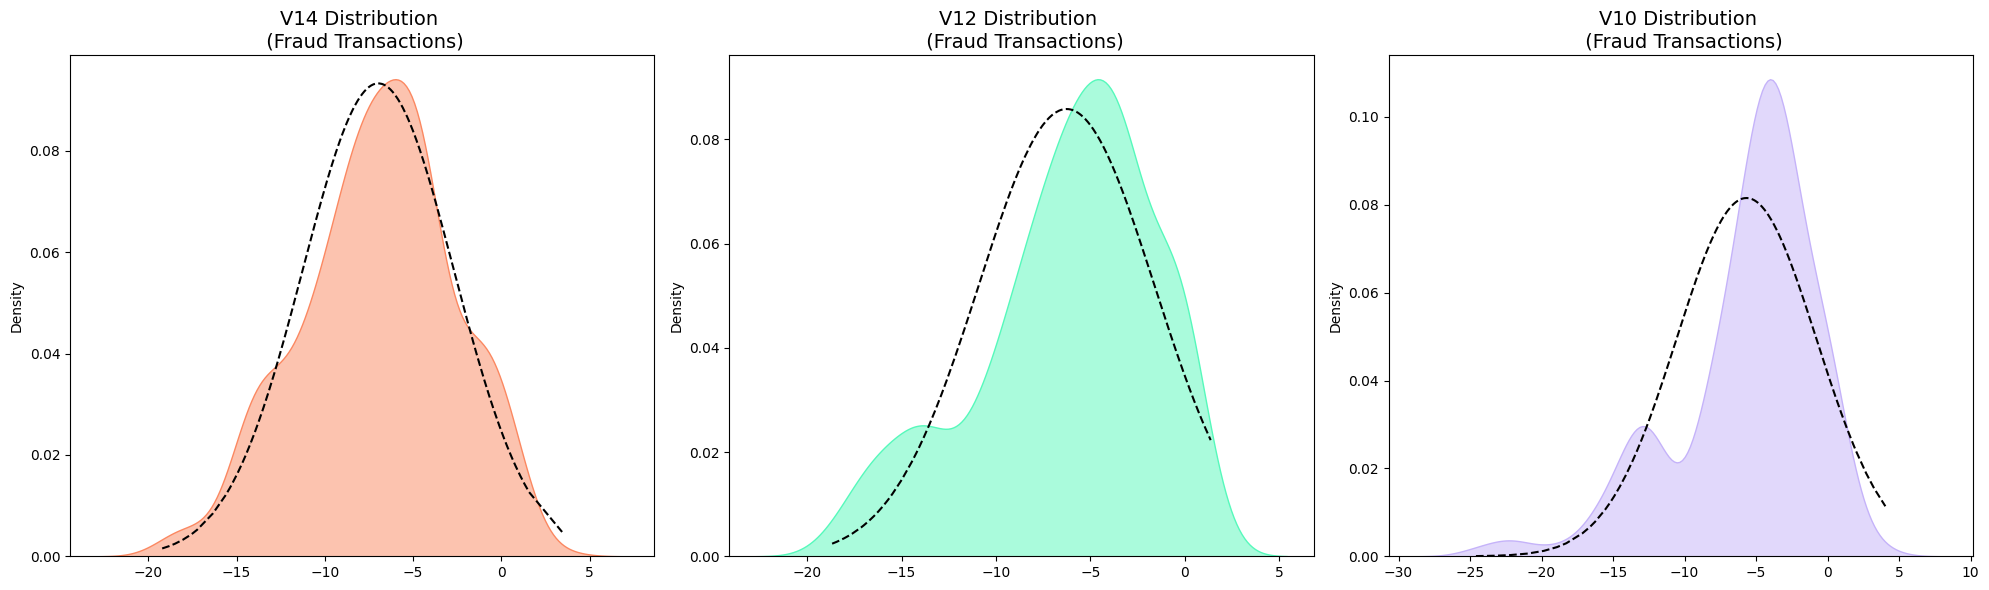

In [ ]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# V14 Fraud Distribution
v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.kdeplot(v14_fraud_dist, ax=ax1, fill=True, color='#FB8861', alpha=0.5)
sns.lineplot(x=v14_fraud_dist, y=norm.pdf(v14_fraud_dist, np.mean(v14_fraud_dist), np.std(v14_fraud_dist)), ax=ax1, color='black', linestyle='--')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

# V12 Fraud Distribution
v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.kdeplot(v12_fraud_dist, ax=ax2, fill=True, color='#56F9BB', alpha=0.5)
sns.lineplot(x=v12_fraud_dist, y=norm.pdf(v12_fraud_dist, np.mean(v12_fraud_dist), np.std(v12_fraud_dist)), ax=ax2, color='black', linestyle='--')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

# V10 Fraud Distribution
v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.kdeplot(v10_fraud_dist, ax=ax3, fill=True, color='#C5B3F9', alpha=0.5)
sns.lineplot(x=v10_fraud_dist, y=norm.pdf(v10_fraud_dist, np.mean(v10_fraud_dist), np.std(v10_fraud_dist)), ax=ax3, color='black', linestyle='--')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
def remove_outliers(dataframe, feature, class_label=1, multiplier=1.5):
    # Identify and remove outliers for a given feature and class label.
    fraud_values = dataframe[feature].loc[dataframe['Class'] == class_label].values
    q25, q75 = np.percentile(fraud_values, 25), np.percentile(fraud_values, 75)
    iqr = q75 - q25
    cut_off = iqr * multiplier
    lower, upper = q25 - cut_off, q75 + cut_off

    outliers = [x for x in fraud_values if x < lower or x > upper]

    print(f"Feature: {feature}")
    print(f"Quartile 25: {q25:.2f} | Quartile 7 5: {q75:.2f}")
    print(f"IQR: {iqr:.2f} | Cut Off: {cut_off:.2f}")
    print(f"Lower Bound: {lower:.2f} | Upper Bound: {upper:.2f}")
    print(f"Number of Outliers: {len(outliers)}")
    print(f"Number of Instances after removing outliers: {len(dataframe) - len(outliers)}")
    print('-' * 50)

    # Remove outliers
    cleaned_df = dataframe.drop(dataframe[(dataframe[feature] > upper) | (dataframe[feature] < lower)].index)
    return cleaned_df

# Removing outliers for V14, V12, and V10
for feature in ['V14', 'V12', 'V10']:
    new_df = remove_outliers(new_df, feature)


Feature: V14
Quartile 25: -9.41 | Quartile 75: -4.29
IQR: 5.12 | Cut Off: 7.67
Lower Bound: -17.08 | Upper Bound: 3.39
Number of Outliers: 5
Number of Instances after removing outliers: 939
--------------------------------------------------
Feature: V12
Quartile 25: -7.84 | Quartile 75: -2.78
IQR: 5.06 | Cut Off: 7.59
Lower Bound: -15.43 | Upper Bound: 4.81
Number of Outliers: 12
Number of Instances after removing outliers: 927
--------------------------------------------------
Feature: V10
Quartile 25: -6.27 | Quartile 75: -2.28
IQR: 3.99 | Cut Off: 5.99
Lower Bound: -12.25 | Upper Bound: 3.71
Number of Outliers: 28
Number of Instances after removing outliers: 899
--------------------------------------------------


In [ ]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

NameError: name 'plt' is not defined

# **Model Building**

## Finding Classifiers

## Learning Curves

## Logistic Regression (Under Sampling)

## SMOTE (Oversampling)

## Model Comparision

# **Data Visualization Tool**